In [1]:
%run dataFormating.ipynb

rmdfTestUsers read_csv success (1/3)
rmdf1522 read_csv success (2/3)
rmdf160 read_csv success (3/3)
gform read_csv success
gformFR read_csv success
temporalities set (user answer method)


IntProgress(value=0, max=1708)

IntProgress(value=0, max=854)

profile info set


FloatProgress(value=0.0, max=621.0)

dataFormating.ipynb:9: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  "outputs": [


In [2]:
import sklearn
print (sklearn.__version__)

0.19.1


In [3]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LassoCV, Lasso

from ipywidgets import FloatProgress
from IPython.display import display

from math import *

from scipy import stats
from scipy.stats.mstats import normaltest

from matplotlib.pyplot import boxplot

# Questionnaire only

## Can the answers to the scientific questions be used to predict if the questionnaire was filled before or after the game?

Note: I am using only decision tree methods here because other methods like naive bayes do not make sense on categorical data

### If scientific questions are coded by answers

In [4]:
# Select columns that correspond to scientific questions
scientificColumns = [x for x in list(defForms.columns.values) if x[0] == "Q"]

# Pick features and target
features = defForms.loc[:, scientificColumns]
target = defForms["temporality"].astype('int') 

In [5]:
# Classify using decision trees -accounts for the small size of the dataset and the categorical nature of the features
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0, max_features="auto")
scores = cross_val_score(clf, features, target)
scores.mean()

0.8657407407407408

In [6]:
# Classify using random forests -accounts for the small size of the dataset and the categorical nature of the features, limit overfitting
clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
scores = cross_val_score(clf, features, target)
scores.mean()

0.9166666666666666

In [7]:
# Classify using extra tree classifiers, more random than random forest methods
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
scores = cross_val_score(clf, features, target)
scores.mean()

0.8796296296296297

Conclusion: Accuracy is around 85%. Not bad but we expected better (17/01/2018)

## If scientific questions are coded by correctedness

In [8]:
# Select columns that correspond to scientific questions
scientificColumns = [x for x in list(defCorrectedForms.columns.values) if x[0] == "Q"]

# Pick features and target
features = defCorrectedForms.loc[:, scientificColumns]
target = defCorrectedForms["temporality"].astype('int') 

In [9]:
# Classify using decision trees -accounts for the small size of the dataset and the categorical nature of the features
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0, max_features="auto")
scores = cross_val_score(clf, features, target)
scores.mean()

0.9206349206349206

In [10]:
# Classify using random forests -accounts for the small size of the dataset and the categorical nature of the features, limit overfitting
clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
scores = cross_val_score(clf, features, target)
scores.mean()

0.9444444444444443

In [11]:
# Classify using extra tree classifiers, more random than random forest methods
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
scores = cross_val_score(clf, features, target)
scores.mean()

0.9404761904761904

Conclusion: Accuracy is around 80%. Not bad but we expected better (19/12/2017)

# RedMetrics only

In [12]:
allDataClassif.columns

Index([ 'sessionsCount',   'scorepretest',  'scoreposttest', 'scoreundefined',
             'complete',      'configure',          'craft',          'death',
                'equip',        'unequip',            'add',         'remove',
              'gotourl',         'pickup',          'reach',        'restart',
           'selectmenu',          'start',     'maxChapter',     'efficiency',
         'thoroughness',            'fun', 'completionTime',                0,
                      1,                2,                3,                4,
                      5,                6,                7,                8,
                      9,               10,               11,               12,
                     13,               14,    'anonymousID'],
      dtype='object')

## Can the score of a player be predicted with their RedMetrics data

In [13]:
# Remove id
anonymousData = allDataClassif.drop("anonymousID", axis = 1)

# Get features and target
# Only select rows where scoreafter is not negative
features = anonymousData[anonymousData["scoreposttest"] >= 0].drop("scoreposttest", axis = 1)
target = anonymousData[anonymousData["scoreposttest"] >= 0]["scoreposttest"]

# Center and scale data
features = preprocessing.scale(features)

array([ 0.37037201,  0.37409839,  0.21707724,  0.34173993,  0.20492361,
        0.30955332,  0.30154902,  0.30284175, -0.12437715,  0.02532766])

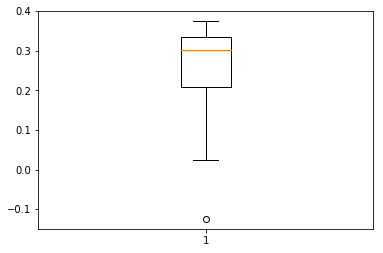

In [14]:
# Run Lasso regression with cross-validation
model = Lasso()
scores = cross_val_score(model, features, target, cv=10)
boxplot(scores)
scores

Conclusion: Score cannot be predicted by the table of RedMetrics data (30/01/2018)

In [15]:
# Remove id
anonymousData = allDataClassif.drop("anonymousID", axis = 1)

# Get features and target
# Only select rows where scoreafter is not negative
features = anonymousData[anonymousData["scoreposttest"] >= 0].drop("scoreposttest", axis = 1)
target = anonymousData[anonymousData["scoreposttest"] >= 0]["scoreposttest"]

# Add polynomial features
secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
features = secondDegreeFeatures.fit_transform(features)

# Center and scale data
features = preprocessing.scale(features)

array([ 0.35511136,  0.38260946,  0.16990377,  0.34053103,  0.22011957,
        0.29912776,  0.30065524,  0.31587307, -0.15002133, -0.0158515 ])

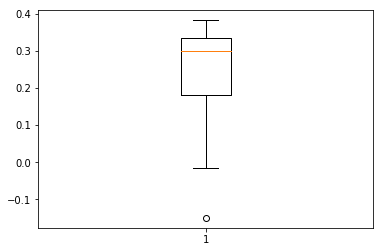

In [16]:
# Run Lasso regression with cross-validation
model = Lasso()
scores = cross_val_score(model, features, target, cv=10)
boxplot(scores)
scores

Conclusion: Score cannot be predicted by the table of RedMetrics data + second degree polynomial (30/01/2018)

Let's try by reducing the number of features

In [17]:
# Remove id
anonymousData = allDataClassif.drop("anonymousID", axis = 1)

# Get features and target
# Only select rows where scoreafter is not negative
features = anonymousData[anonymousData["scoreposttest"] >= 0]
features = features[["craft", "death", "add", "remove", "reach", "maxChapter"] + list(range(15))]
target = anonymousData[anonymousData["scoreposttest"] >= 0]["scoreposttest"]

# Add polynomial features
secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
features = secondDegreeFeatures.fit_transform(features)

# Center and scale data
features = preprocessing.scale(features)

array([ 0.2999833 ,  0.34631439,  0.05794757,  0.26057465,  0.13812003,
        0.25903208,  0.29150645,  0.21390869, -0.32360949, -0.04664501])

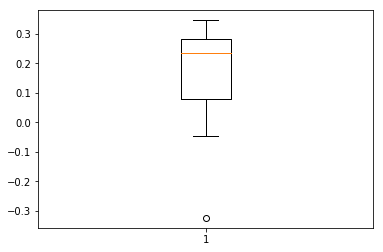

In [18]:
# Run Lasso regression with cross-validation
model = Lasso()
scores = cross_val_score(model, features, target, cv=10)
boxplot(scores)
scores

Conclusion: Tried different combinations, but cannot find any interesting regression (02/02/2018)

# Questionnaire and RedMetrics

## Can the biology level of a player be predicted using the game data?

In [19]:
# Remove id
anonymousData = gameAndCorrectedAfterDataClassif.drop("anonymousID", axis = 1)

# Get features and target
# Only select rows where scoreafter is not negative
features = anonymousData[anonymousData["scoreposttest"] >= 0]
features = features.loc[:,"sessionsCount":"completionTime"]
target = anonymousData[anonymousData["scoreposttest"] >= 0]["biologyStudy"]

# Add polynomial features
secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
features = secondDegreeFeatures.fit_transform(features)

# Center and scale data
features = preprocessing.scale(features)

C:\Users\Mikael\Anaconda3\envs\conda-env-python3-py\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


array([-7.54828433e-02, -2.60318809e-01, -3.58352892e-02, -1.27990098e+00,
       -6.31793969e-01, -1.24716109e-01, -4.24168975e-03, -5.07707598e-02,
       -5.13244460e-01, -1.10352904e-03])

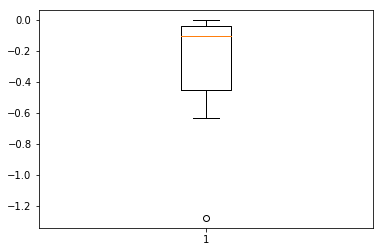

In [20]:
# Run Lasso regression with cross-validation
model = Lasso()
scores = cross_val_score(model, features, target, cv=10)
boxplot(scores)
scores

Conclusion: No (30/01/2018)

## Can the gaming profile of a player be predicted using the game data?

In [21]:
# Remove id
anonymousData = gameAndCorrectedAfterDataClassif.drop("anonymousID", axis = 1)

# Get features and target
# Only select rows where scoreafter is not negative
features = anonymousData.loc[:,"sessionsCount":"completionTime"]
target = sum(anonymousData["gameInterest"], anonymousData["gameFrequency"])

# Add polynomial features
secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
features = secondDegreeFeatures.fit_transform(features)

# Center and scale data
features = preprocessing.scale(features)

C:\Users\Mikael\Anaconda3\envs\conda-env-python3-py\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


array([-8.72789009e-03, -3.19017570e-02, -3.61235227e-04, -4.31011923e-01,
       -5.93004313e-02, -3.61235227e-04, -8.27419426e-02, -1.08546219e-01,
       -2.35774342e-01, -1.08546219e-01])

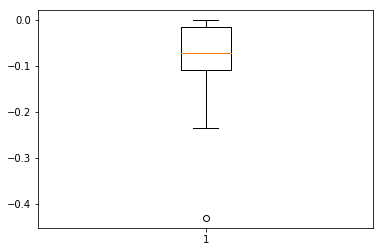

In [22]:
# Run Lasso regression with cross-validation
model = Lasso()
scores = cross_val_score(model, features, target, cv=10)
boxplot(scores)
scores

Conclusion: No (30/01/2018)

## Can the completion time of each chapter be used to predict if a player is going to answer a specific scientific question correctly

In [23]:
# Given a question tag, plot scores of cross-validated model
def tryClassification(data, scientificQuestion):
    # Remove id
    anonymousData = data.drop("anonymousID", axis = 1)

    # Get features and target
    # Only select rows where scoreafter is not negative
    features = anonymousData[anonymousData["scoreposttest"] >= 0]
    features = features.iloc[:,24:37]
    target = anonymousData[anonymousData["scoreposttest"] >= 0].loc[:,scientificQuestion].astype('int')

    # Add polynomial features
    secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
    features = secondDegreeFeatures.fit_transform(features)

    # Center and scale data
    features = preprocessing.scale(features)
    
    # Classify using extra tree classifiers, more random than random forest methods
    clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
    scores = cross_val_score(clf, features, target, cv=5)
    
    # Display plot
    fig, ax = plt.subplots()
    boxplot(scores)
    
    return [scores.mean(), scores.std()]

C:\Users\Mikael\Anaconda3\envs\conda-env-python3-py\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\Mikael\Anaconda3\envs\conda-env-python3-py\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\Mikael\Anaconda3\envs\conda-env-python3-py\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`

,QGenotypePhenotype,QBioBricksDevicesComposition,QAmpicillin,QBBNamePlasmid,QBBFunctionTER,QBBNamePromoter,QBBFunctionGameCDS,QBBNameTerminator,QBBFunctionBiologyCDS,QBBNameRBS,...,QDevicePconsRbsFlhdcTer,QDevicePbadRbsGfpTer,QDevicePbadGfpTbsTer,QDeviceGfpRbsPconsTer,QDevicePconsGfpRbsTer,QDeviceAmprRbsPconsTer,QDeviceRbsPconsAmprTer,QGreenFluorescence,QUnequipDevice,QDevicePbadRbsAraTer
Mean,0.738590,0.652436,0.610769,0.644231,0.676795,0.707692,0.848923,0.563410,0.787179,0.856923,...,0.731564,0.769538,0.651077,0.681000,0.769538,0.777077,0.729231,0.601282,0.618590,0.849231
Var,0.050482,0.063014,0.033225,0.044872,0.083349,0.044522,0.039981,0.074492,0.040216,0.048494,...,0.078182,0.059699,0.043801,0.067345,0.040545,0.060374,0.083293,0.101792,0.068383,0.046501


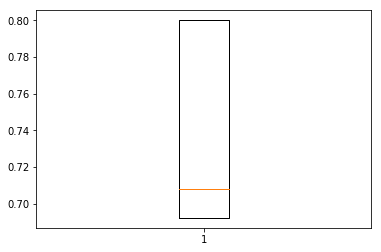

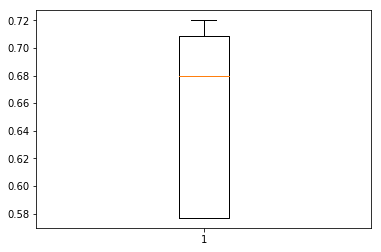

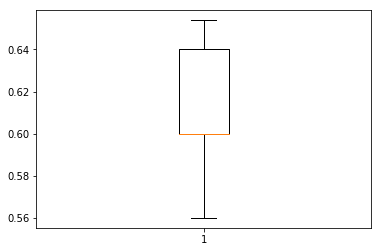

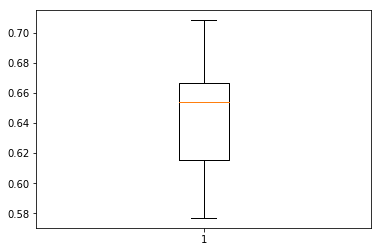

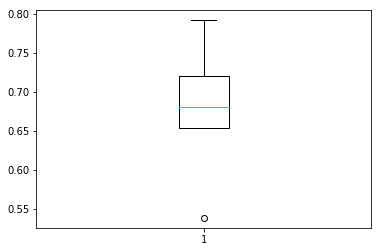

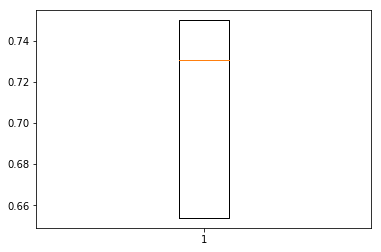

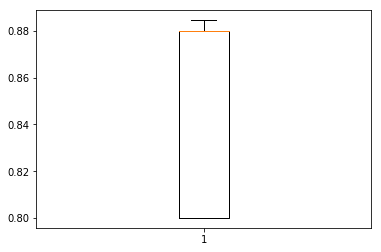

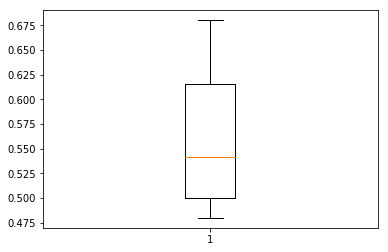

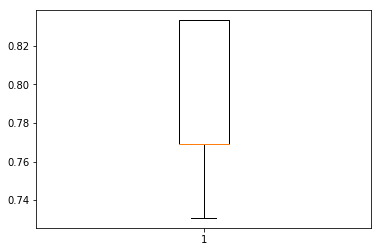

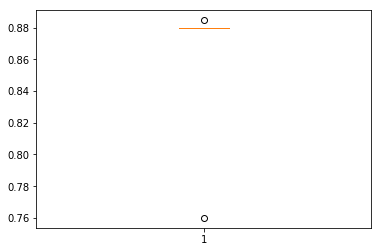

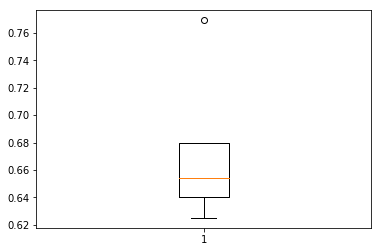

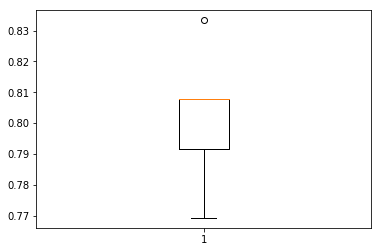

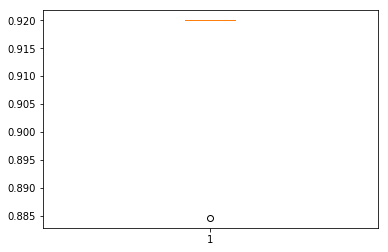

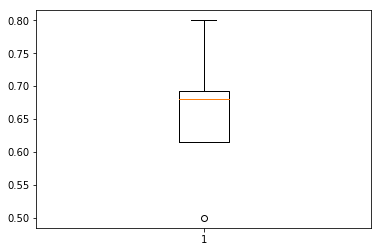

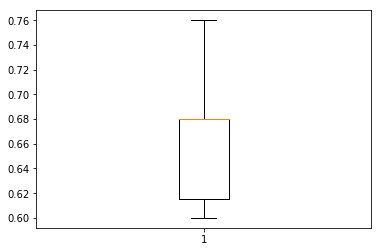

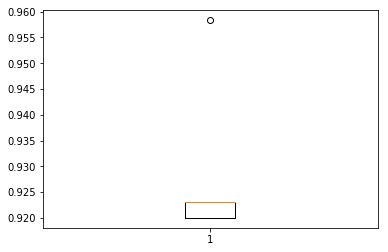

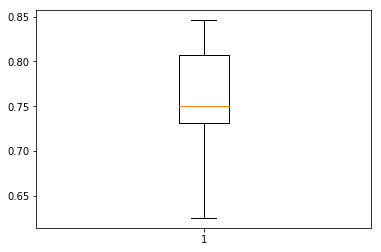

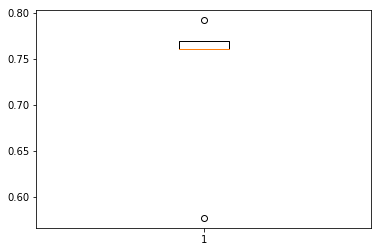

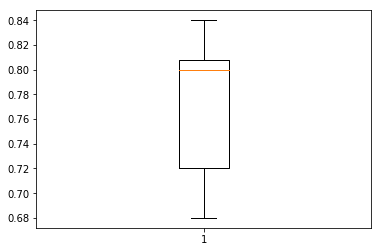

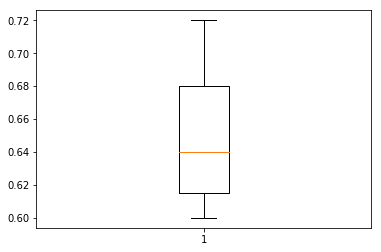

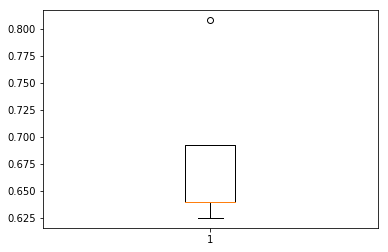

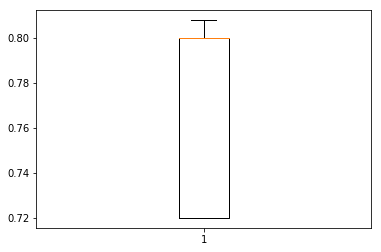

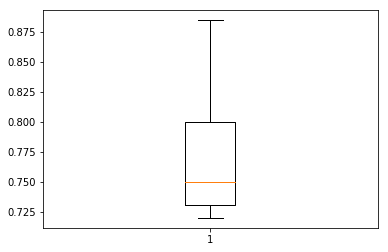

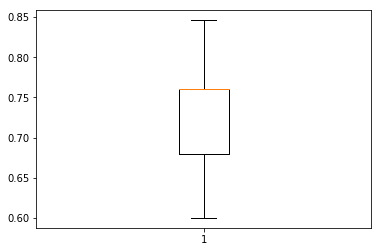

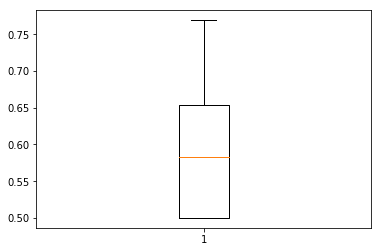

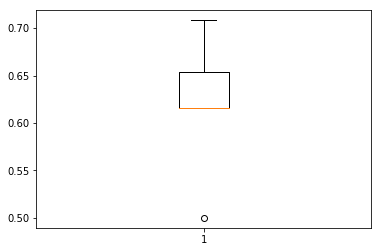

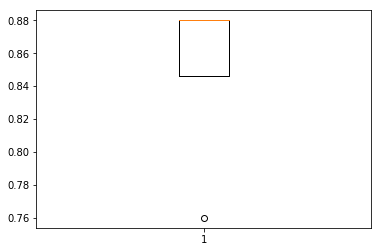

In [24]:
allScores = pd.DataFrame(index = ["Mean", "Var"])
for question in ["QGenotypePhenotype", "QBioBricksDevicesComposition", "QAmpicillin", "QBBNamePlasmid", "QBBFunctionTER", "QBBNamePromoter", "QBBFunctionGameCDS", "QBBNameTerminator", "QBBFunctionBiologyCDS", "QBBNameRBS", "QBBExampleCDS", "QBBNameCDS", "QBBFunctionPR", "QBBFunctionRBS", "QBBFunctionPLASMID", "QBBNameOperator", "QDeviceRbsPconsFlhdcTer", "QDevicePconsRbsFlhdcTer", "QDevicePbadRbsGfpTer", "QDevicePbadGfpTbsTer", "QDeviceGfpRbsPconsTer", "QDevicePconsGfpRbsTer", "QDeviceAmprRbsPconsTer", "QDeviceRbsPconsAmprTer", "QGreenFluorescence", "QUnequipDevice", "QDevicePbadRbsAraTer"]:
    questionTag = question
    scores = tryClassification(gameAndCorrectedAfterDataClassif, questionTag)
    allScores[questionTag] = scores
allScores

Conclusion: Redmetrics can be used to predict answers to certain scientific questions (29/05/2018)
TODO Raphael: Check which questions you want additional analysis for

## Can the game data be used to predict the performance on a sub-group of scientific questions?

### Hard questions

C:\Users\Mikael\Anaconda3\envs\conda-env-python3-py\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


1.0

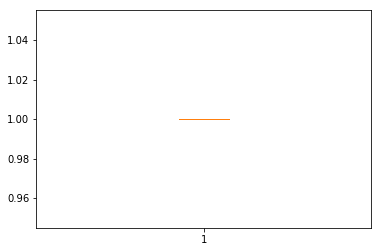

In [25]:
# Remove id
anonymousData = gameAndCorrectedAfterDataClassif.drop("anonymousID", axis = 1)

# Get features and target
features = pd.concat([anonymousData.loc[:,"sessionsCount":"completionTime"], anonymousData.loc[:,"gameInterest":"previousPlay"]], axis=1)
target = anonymousData.loc[:,["QBBFunctionPR", "QBBNameOperator", "QDevicePbadRbsAraTer"]].astype(int).sum(axis=1)
target = target.apply(lambda x: 0 if x < 3 else 1)

# Add polynomial features
secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
features = secondDegreeFeatures.fit_transform(features)

# Center and scale data
features = preprocessing.scale(features)
    
# Classify using extra tree classifiers, more random than random forest methods
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
scores = cross_val_score(clf, features, target, cv=10)
    
# Display plot
boxplot(scores)
scores.mean()

In [26]:
# Classify using random forests -accounts for the small size of the dataset and the categorical nature of the features, limit overfitting
clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
scores = cross_val_score(clf, features, target)
scores.mean()

1.0

Conclusion: Very high quality prediction (29/05/18)

### Biobrick symbol recognition

In [27]:
# Remove id
anonymousData = gameAndCorrectedAfterDataClassif.drop("anonymousID", axis = 1)

bbSymbolRecognition = ["QBBNamePlasmid", "QBBFunctionTER", "QBBNamePromoter", "QBBFunctionGameCDS", "QBBNameTerminator", "QBBFunctionBiologyCDS", "QBBNameRBS", "QBBExampleCDS", "QBBNameCDS", "QBBFunctionPR", "QBBFunctionRBS", "QBBFunctionPLASMID", "QBBNameOperator"]

# Get features and target
# Only select rows where scoreafter is not negative
features = pd.concat([anonymousData.loc[:,"sessionsCount":"completionTime"], anonymousData.loc[:,"gameInterest":"previousPlay"]], axis=1)
target = anonymousData.loc[:,bbSymbolRecognition].astype(int).sum(axis=1)

# Add polynomial features
secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
features = secondDegreeFeatures.fit_transform(features)

# Center and scale data
features = preprocessing.scale(features)

C:\Users\Mikael\Anaconda3\envs\conda-env-python3-py\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


0.5659930035829683

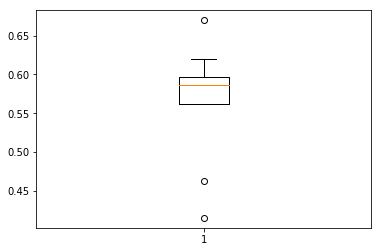

In [28]:
# Run Lasso regression with cross-validation
model = Lasso()
scores = cross_val_score(model, features, target, cv=10)
boxplot(scores)
scores.mean()

Conclusion: No apparent possible prediction (1/02/2018)

### Easy questions

In [29]:
# Remove id
anonymousData = gameAndCorrectedAfterDataClassif.drop("anonymousID", axis = 1)

# Get features and target
features = pd.concat([anonymousData.loc[:,"sessionsCount":"completionTime"], anonymousData.loc[:,"gameInterest":"previousPlay"]], axis=1)
target = anonymousData.loc[:,["QBioBricksDevicesComposition", "QDeviceRbsPconsFlhdcTer", "QGreenFluorescence"]].astype(int).sum(axis=1)

# Add polynomial features
secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
features = secondDegreeFeatures.fit_transform(features)

# Center and scale data
features = preprocessing.scale(features)

C:\Users\Mikael\Anaconda3\envs\conda-env-python3-py\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


-0.23768933464830147

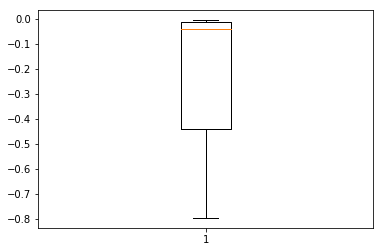

In [30]:
# Run Lasso regression with cross-validation
model = Lasso()
scores = cross_val_score(model, features, target, cv=10)
boxplot(scores)
scores.mean()

(array([21., 29., 34., 42.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 13 Patch objects>)

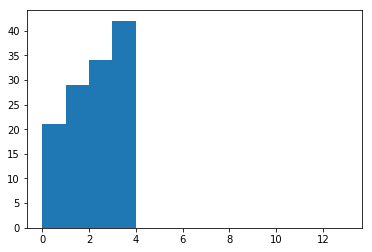

In [31]:
plt.hist(target, bins = range(14))

Conclusion: Inconclusive (01/02/2018)

## Can the completion time be predicted from questionnaire answers?

### From the before questionnaire

In [32]:
# Remove id
anonymousData = gameAndCorrectedBeforeDataClassif.drop("anonymousID", axis = 1)

# Get features and target
lastColumn = 'gender_Male'
for potentialLastColumn in ['gender_Other', 'gender_Prefer not to say']:
    if potentialLastColumn in anonymousData.columns:
        lastColumn = potentialLastColumn
features = anonymousData.loc[:,"gameInterest":lastColumn]
target = anonymousData.loc[:,"completionTime"]

# Add polynomial features
secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
features = secondDegreeFeatures.fit_transform(features)

# Center and scale data
features = preprocessing.scale(features)

-0.3915603892101344

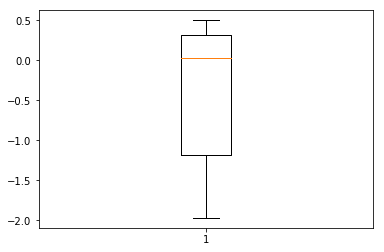

In [33]:
# Run Lasso regression with cross-validation
model = Lasso(max_iter=10000, alpha=10)
scores = cross_val_score(model, features, target, cv=10)
boxplot(scores)
scores.mean()

0.7619047619047619

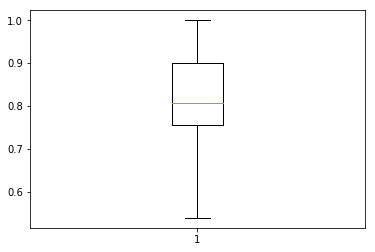

In [34]:
# Try classification
target = target.apply(lambda x: 0 if x < 7200 else 1) #0 if short, 1 if long

# Classify using extra tree classifiers, more random than random forest methods
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
scores = cross_val_score(clf, features, target, cv=10)
    
# Display plot
boxplot(scores)
scores.mean()
sum(target)/len(target)

Conclusion: No (01/02/2018)

### From the after questionnaire

In [35]:
# Remove id
anonymousData = gameAndCorrectedAfterDataClassif.drop("anonymousID", axis = 1)

# Get features and target
lastColumn = 'gender_Male'
for potentialLastColumn in ['gender_Other', 'gender_Prefer not to say']:
    if potentialLastColumn in anonymousData.columns:
        lastColumn = potentialLastColumn
features = anonymousData.loc[:,"gameInterest":lastColumn]
target = anonymousData.loc[:,"completionTime"]

# Add polynomial features
secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
features = secondDegreeFeatures.fit_transform(features)

# Center and scale data
features = preprocessing.scale(features)

0.01597954903485064

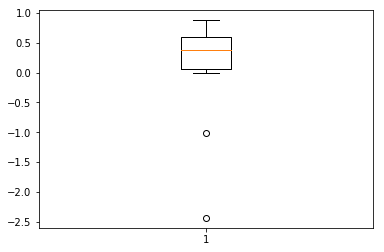

In [36]:
# Run Lasso regression with cross-validation
model = Lasso(max_iter=1000000)
scores = cross_val_score(model, features, target, cv=10)
boxplot(scores)
scores.mean()

0.825

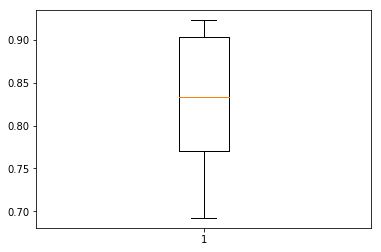

In [37]:
# Try classification
target = target.apply(lambda x: 0 if x < 7200 else 1) #0 if short, 1 if long

# Classify using extra tree classifiers, more random than random forest methods
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
scores = cross_val_score(clf, features, target, cv=10)
    
# Display plot
boxplot(scores)
scores.mean()

Conclusion: Yes (29/05/18)

In [38]:
sum(target)

96

In [39]:
len(target)

126

Conclusion: Yes but very unbalanced classes (29/05/18)